In [362]:
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt

In [363]:
path = "../HW2/"
problemSets = ["NK", "ZKW", "ZKC"]

In [364]:
# I WANT: (NK, ZKC, ZKW) -> NK = ([confs], [times], [results], [deviations]) -> times = [instanceSizes] -> instanceSize = [int]


def dataOfAlgo(algoName):
  algoNK = dataOfFile(path + algoName + "NK")
  algoZKW = dataOfFile(path + algoName + "ZKW")
  algoZKC = dataOfFile(path + algoName + "ZKC")
  return (algoNK, algoZKW, algoZKC)

def dataOfFile(filename):
  lines = ''.join(readFile(filename))
  segments = lines.split("=")
  confs = segmentToValues(segments[0])
  times = segmentToTimes(segments[1])
  results = segmentToValues(segments[2])
  return (confs, times, results)

def segmentToValues(segment):
  instanceSizes = segment.split("\n")
  result = []
  for i in instanceSizes:
    if(len(i) > 1):
      values = list(map(int, i.split(" ")))
      result.append(values)
  return result

def segmentToTimes(segment):
  instanceSizes = segment.split("\n")
  result = []
  for i in instanceSizes:
    if(len(i) > 1):
      values = list(map(lambda t: int(t) / 10e6, i.split(" ")))
      result.append(values)
  return result

def readFile(filename):
  with open(path + filename) as f:
    lines = f.readlines()
    return lines
    

In [365]:
bf = dataOfAlgo("BruteForce")
bb = dataOfAlgo("BranchBound")
dp = dataOfAlgo("DynamicProgrammingPrice")
f0001 = dataOfAlgo("FPTAS-0.001")
f001 = dataOfAlgo("FPTAS-0.01")
f01 = dataOfAlgo("FPTAS-0.1")
f1 = dataOfAlgo("FPTAS-1.0")
f03 = dataOfAlgo("FPTAS-0.3")
f05 = dataOfAlgo("FPTAS-0.5")
f07 = dataOfAlgo("FPTAS-0.7")
f09 = dataOfAlgo("FPTAS-0.9")
g = dataOfAlgo("Greedy")
gr = dataOfAlgo("GreedyRedux")

instSizes = [4, 10, 15, 20, 22, 25, 27, 30, 32, 35, 37, 40]

In [366]:
def deviation(value1, value2):
  return abs(value1 - value2) / max(value1, value2, 1)

def avg(data):
  return sum(data) / len(data)

def getDeviationsPSet(data, optData):
  resultsData = data[2]
  resultsOData = optData[2]

  deviations = []
  for i,f in enumerate(resultsData):
    fDeviations = []
    for j,r in enumerate(f):
      devi = deviation(resultsData[i][j], resultsOData[i][j])
      fDeviations.append(devi)
    deviations.append(fDeviations)
  return deviations

def getDevs(data, optData):
  dnk = getDeviationsPSet(data[0], optData[0])
  dzkc = getDeviationsPSet(data[1], optData[1])
  dzkw = getDeviationsPSet(data[2], optData[2])
  return (dnk, dzkc, dzkw)


def getMaxsPSet(data):
  maxs = []
  for f in data:
    maxs.append(max(f))
  return maxs

def getAvgsPSet(data):
  maxs = []
  for f in data:
    maxs.append(avg(f))
  return maxs

def getMaxs(data):
  mnk = getMaxsPSet(data[0][1])
  mzkc = getMaxsPSet(data[1][1])
  mzkw = getMaxsPSet(data[2][1])
  return (mnk, mzkc, mzkw)

def getAvgs(data):
  mnk = getAvgsPSet(data[0][1])
  mzkc = getAvgsPSet(data[1][1])
  mzkw = getAvgsPSet(data[2][1])
  return (mnk, mzkc, mzkw)

def getMaxDevs(data, oData=dp):
  values = getDevs(data, oData)
  mnk = getMaxsPSet(values[0])
  mzkc = getMaxsPSet(values[1])
  mzkw = getMaxsPSet(values[2])
  return (mnk, mzkc, mzkw)

def getAvgDevs(data, oData=dp):
  values = getDevs(data, oData)
  mnk = getAvgsPSet(values[0])
  mzkc = getAvgsPSet(values[1])
  mzkw = getAvgsPSet(values[2])
  return (mnk, mzkc, mzkw)

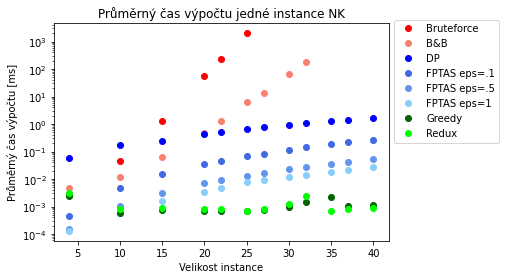

In [367]:
plt.plot(instSizes[:len(bf[0][1])], getAvgs(bf)[0], 'o', label="Bruteforce", color="red")
plt.plot(instSizes[:len(bb[0][1])], getAvgs(bb)[0], 'o', label="B&B", color="salmon")
plt.plot(instSizes[:len(dp[0][1])], getAvgs(dp)[0], 'o', label="DP", color="blue")
plt.plot(instSizes[:len(f01[0][1])], getAvgs(f01)[0], 'o', label="FPTAS eps=.1", color="royalblue")
plt.plot(instSizes[:len(f05[0][1])], getAvgs(f05)[0], 'o', label="FPTAS eps=.5", color="cornflowerblue")
plt.plot(instSizes[:len(f1[0][1])], getAvgs(f1)[0], 'o', label="FPTAS eps=1", color="lightskyblue")
plt.plot(instSizes[:len(g[0][1])], getAvgs(g)[0], 'o', label="Greedy", color="darkgreen")
plt.plot(instSizes[:len(gr[0][1])], getAvgs(gr)[0], 'o', label="Redux", color="lime")
plt.yscale("log")
plt.xlabel("Velikost instance")
plt.ylabel("Průměrný čas výpočtu [ms]")
plt.title('Průměrný čas výpočtu jedné instance NK')
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')

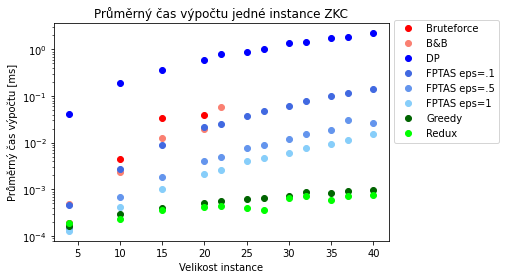

In [368]:
plt.plot(instSizes[:len(bf[1][1])], getAvgs(bf)[1], 'o', label="Bruteforce", color="red")
plt.plot(instSizes[:len(bb[1][1])], getAvgs(bb)[1], 'o', label="B&B", color="salmon")
plt.plot(instSizes[:len(dp[1][1])], getAvgs(dp)[1], 'o', label="DP", color="blue")
plt.plot(instSizes[:len(f01[1][1])], getAvgs(f01)[1], 'o', label="FPTAS eps=.1", color="royalblue")
plt.plot(instSizes[:len(f05[1][1])], getAvgs(f05)[1], 'o', label="FPTAS eps=.5", color="cornflowerblue")
plt.plot(instSizes[:len(f1[1][1])], getAvgs(f1)[1], 'o', label="FPTAS eps=1", color="lightskyblue")
plt.plot(instSizes[:len(g[1][1])], getAvgs(g)[1], 'o', label="Greedy", color="darkgreen")
plt.plot(instSizes[:len(gr[1][1])], getAvgs(gr)[1], 'o', label="Redux", color="lime")
plt.yscale("log")
plt.xlabel("Velikost instance")
plt.ylabel("Průměrný čas výpočtu [ms]")
plt.title('Průměrný čas výpočtu jedné instance ZKC')
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')

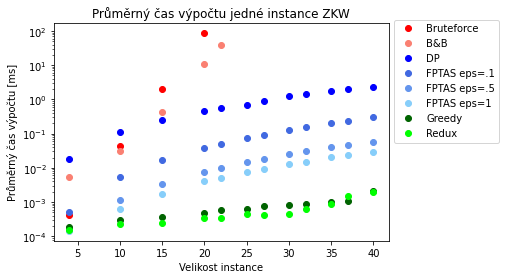

In [369]:
plt.plot(instSizes[:len(bf[2][1])], getAvgs(bf)[2], 'o', label="Bruteforce", color="red")
plt.plot(instSizes[:len(bb[2][1])], getAvgs(bb)[2], 'o', label="B&B", color="salmon")
plt.plot(instSizes[:len(dp[2][1])], getAvgs(dp)[2], 'o', label="DP", color="blue")
plt.plot(instSizes[:len(f01[2][1])], getAvgs(f01)[2], 'o', label="FPTAS eps=.1", color="royalblue")
plt.plot(instSizes[:len(f05[2][1])], getAvgs(f05)[2], 'o', label="FPTAS eps=.5", color="cornflowerblue")
plt.plot(instSizes[:len(f1[2][1])], getAvgs(f1)[2], 'o', label="FPTAS eps=1", color="lightskyblue")
plt.plot(instSizes[:len(g[2][1])], getAvgs(g)[2], 'o', label="Greedy", color="darkgreen")
plt.plot(instSizes[:len(gr[2][1])], getAvgs(gr)[2], 'o', label="Redux", color="lime")
plt.yscale("log")
plt.xlabel("Velikost instance")
plt.ylabel("Průměrný čas výpočtu [ms]")
plt.title('Průměrný čas výpočtu jedné instance ZKW')
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')

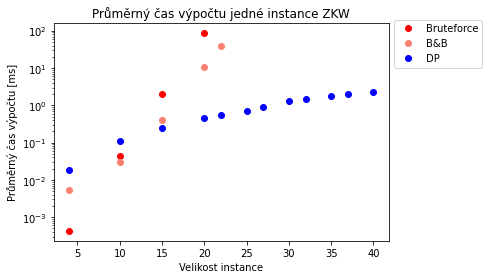

In [370]:
plt.plot(instSizes[:len(bf[2][1])], getAvgs(bf)[2], 'o', label="Bruteforce", color="red")
plt.plot(instSizes[:len(bb[2][1])], getAvgs(bb)[2], 'o', label="B&B", color="salmon")
plt.plot(instSizes[:len(dp[2][1])], getAvgs(dp)[2], 'o', label="DP", color="blue")
plt.yscale("log")
plt.xlabel("Velikost instance")
plt.ylabel("Průměrný čas výpočtu [ms]")
plt.title('Průměrný čas výpočtu jedné instance ZKW')
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')

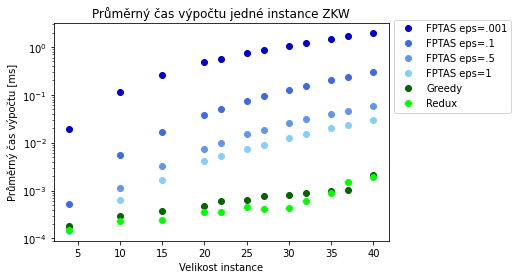

In [371]:
plt.plot(instSizes[:len(f0001[2][1])], getAvgs(f0001)[2], 'o', label="FPTAS eps=.001", color="mediumblue")
plt.plot(instSizes[:len(f01[2][1])], getAvgs(f01)[2], 'o', label="FPTAS eps=.1", color="royalblue")
plt.plot(instSizes[:len(f05[2][1])], getAvgs(f05)[2], 'o', label="FPTAS eps=.5", color="cornflowerblue")
plt.plot(instSizes[:len(f1[2][1])], getAvgs(f1)[2], 'o', label="FPTAS eps=1", color="lightskyblue")
plt.plot(instSizes[:len(g[2][1])], getAvgs(g)[2], 'o', label="Greedy", color="darkgreen")
plt.plot(instSizes[:len(gr[2][1])], getAvgs(gr)[2], 'o', label="Redux", color="lime")
plt.yscale("log")
plt.xlabel("Velikost instance")
plt.ylabel("Průměrný čas výpočtu [ms]")
plt.title('Průměrný čas výpočtu jedné instance ZKW')
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')

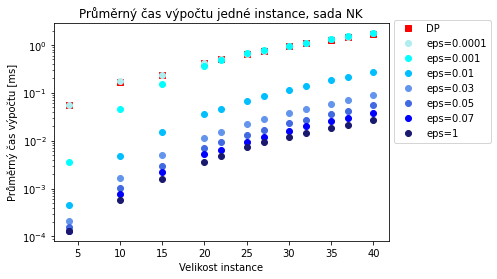

In [372]:
plt.plot(instSizes[:len(dp[0][1])], getAvgs(dp)[0], 's', label="DP", color="red")
plt.plot(instSizes[:len(f0001[0][1])], getAvgs(f0001)[0], 'o', label="eps=0.0001", color="paleturquoise")
plt.plot(instSizes[:len(f001[0][1])], getAvgs(f001)[0], 'o', label="eps=0.001", color="cyan")
plt.plot(instSizes[:len(f01[0][1])], getAvgs(f01)[0], 'o', label="eps=0.01", color="deepskyblue")
plt.plot(instSizes[:len(f03[0][1])], getAvgs(f03)[0], 'o', label="eps=0.03", color="cornflowerblue")
plt.plot(instSizes[:len(f05[0][1])], getAvgs(f05)[0], 'o', label="eps=0.05", color="royalblue")
plt.plot(instSizes[:len(f07[0][1])], getAvgs(f07)[0], 'o', label="eps=0.07", color="blue")
plt.plot(instSizes[:len(f1[0][1])], getAvgs(f1)[0], 'o', label="eps=1", color="midnightblue")
plt.yscale("log")
plt.xlabel("Velikost instance")
plt.ylabel("Průměrný čas výpočtu [ms]")
plt.title('Průměrný čas výpočtu jedné instance, sada NK')
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')

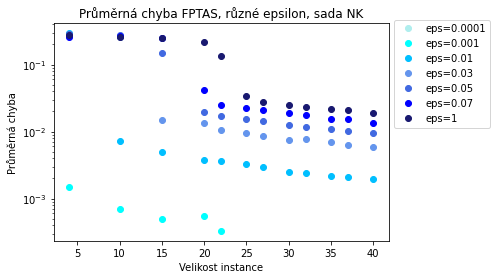

In [373]:
plt.plot(instSizes[:len(f0001[0][1])], getAvgDevs(f0001)[0], 'o', label="eps=0.0001", color="paleturquoise")
plt.plot(instSizes[:len(f001[0][1])], getAvgDevs(f001)[0], 'o', label="eps=0.001", color="cyan")
plt.plot(instSizes[:len(f01[0][1])], getAvgDevs(f01)[0], 'o', label="eps=0.01", color="deepskyblue")
plt.plot(instSizes[:len(f03[0][1])], getAvgDevs(f03)[0], 'o', label="eps=0.03", color="cornflowerblue")
plt.plot(instSizes[:len(f05[0][1])], getAvgDevs(f05)[0], 'o', label="eps=0.05", color="royalblue")
plt.plot(instSizes[:len(f07[0][1])], getAvgDevs(f07)[0], 'o', label="eps=0.07", color="blue")
plt.plot(instSizes[:len(f1[0][1])], getAvgDevs(f1)[0], 'o', label="eps=1", color="midnightblue")
plt.yscale("log")
plt.xlabel("Velikost instance")
plt.ylabel("Průměrná chyba")
plt.title('Průměrná chyba FPTAS, různé epsilon, sada NK')
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')

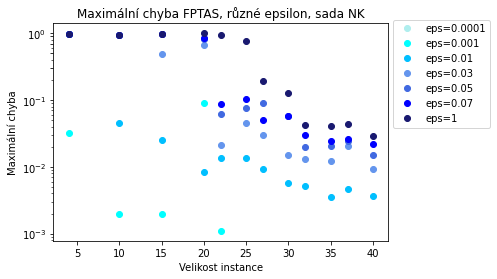

In [374]:
plt.plot(instSizes[:len(f0001[0][1])], getMaxDevs(f0001)[0], 'o', label="eps=0.0001", color="paleturquoise")
plt.plot(instSizes[:len(f001[0][1])], getMaxDevs(f001)[0], 'o', label="eps=0.001", color="cyan")
plt.plot(instSizes[:len(f01[0][1])], getMaxDevs(f01)[0], 'o', label="eps=0.01", color="deepskyblue")
plt.plot(instSizes[:len(f03[0][1])], getMaxDevs(f03)[0], 'o', label="eps=0.03", color="cornflowerblue")
plt.plot(instSizes[:len(f05[0][1])], getMaxDevs(f05)[0], 'o', label="eps=0.05", color="royalblue")
plt.plot(instSizes[:len(f07[0][1])], getMaxDevs(f07)[0], 'o', label="eps=0.07", color="blue")
plt.plot(instSizes[:len(f1[0][1])], getMaxDevs(f1)[0], 'o', label="eps=1", color="midnightblue")
plt.yscale("log")
plt.yticks([1, 0.9, 0.7, 0.5, 0.3, 0.1, 0.01, 0.001])
plt.xlabel("Velikost instance")
plt.ylabel("Maximální chyba")
plt.title('Maximální chyba FPTAS, různé epsilon, sada NK')
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')

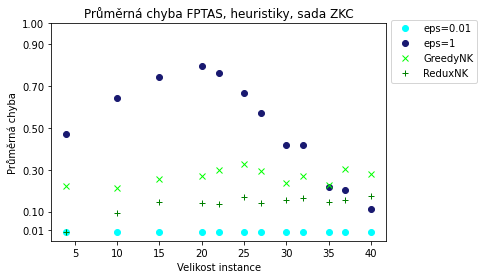

In [375]:
plt.plot(instSizes[:len(f001[0][1])], getAvgDevs(f001)[1], 'o', label="eps=0.01", color="cyan")
plt.plot(instSizes[:len(f1[0][1])], getAvgDevs(f1)[1], 'o', label="eps=1", color="midnightblue")
plt.plot(instSizes[:len(f0001[0][1])], getAvgDevs(g)[1], 'x', label="GreedyNK", color="lime")
plt.plot(instSizes[:len(f0001[0][1])], getAvgDevs(gr)[1], '+', label="ReduxNK", color="green")
plt.yticks([1, 0.9, 0.7, 0.5, 0.3, 0.1, 0.01])
plt.xlabel("Velikost instance")
plt.ylabel("Průměrná chyba")
plt.title('Průměrná chyba FPTAS, heuristiky, sada ZKC')
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')

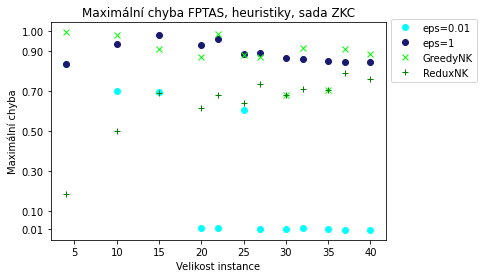

In [380]:
plt.plot(instSizes[:len(f001[0][1])], getMaxDevs(f001)[1], 'o', label="eps=0.01", color="cyan")
plt.plot(instSizes[:len(f1[0][1])], getMaxDevs(f1)[1], 'o', label="eps=1", color="midnightblue")
plt.plot(instSizes[:len(f0001[0][1])], getMaxDevs(g)[1], 'x', label="GreedyNK", color="lime")
plt.plot(instSizes[:len(f0001[0][1])], getMaxDevs(gr)[1], '+', label="ReduxNK", color="green")
plt.yticks([1, 0.9, 0.7, 0.5, 0.3, 0.1, 0.01])
plt.xlabel("Velikost instance")
plt.ylabel("Maximální chyba")
plt.title('Maximální chyba FPTAS, heuristiky, sada ZKC')
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')

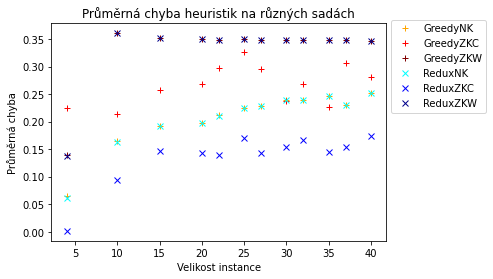

In [377]:
plt.plot(instSizes[:len(f0001[0][1])], getAvgDevs(g)[0], '+', label="GreedyNK", color="orange")
plt.plot(instSizes[:len(f0001[0][1])], getAvgDevs(g)[1], '+', label="GreedyZKC", color="red")
plt.plot(instSizes[:len(f0001[0][1])], getAvgDevs(g)[2], '+', label="GreedyZKW", color="maroon")
plt.plot(instSizes[:len(f0001[0][1])], getAvgDevs(gr)[0], 'x', label="ReduxNK", color="cyan")
plt.plot(instSizes[:len(f0001[0][1])], getAvgDevs(gr)[1], 'x', label="ReduxZKC", color="blue")
plt.plot(instSizes[:len(f0001[0][1])], getAvgDevs(gr)[2], 'x', label="ReduxZKW", color="darkblue")
plt.xlabel("Velikost instance")
plt.ylabel("Průměrná chyba")
plt.title('Průměrná chyba heuristik na různých sadách')
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')

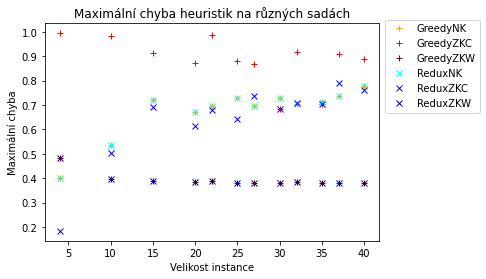

In [378]:
plt.plot(instSizes[:len(f0001[0][1])], getMaxDevs(g)[0], '+', label="GreedyNK", color="orange")
plt.plot(instSizes[:len(f0001[0][1])], getMaxDevs(g)[1], '+', label="GreedyZKC", color="red")
plt.plot(instSizes[:len(f0001[0][1])], getMaxDevs(g)[2], '+', label="GreedyZKW", color="maroon")
plt.plot(instSizes[:len(f0001[0][1])], getMaxDevs(gr)[0], 'x', label="ReduxNK", color="cyan")
plt.plot(instSizes[:len(f0001[0][1])], getMaxDevs(gr)[1], 'x', label="ReduxZKC", color="blue")
plt.plot(instSizes[:len(f0001[0][1])], getMaxDevs(gr)[2], 'x', label="ReduxZKW", color="darkblue")
plt.xlabel("Velikost instance")
plt.ylabel("Maximální chyba")
plt.title('Maximální chyba heuristik na různých sadách')
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')